### Imports

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.extend(['/home/nkinsky/Documents/GitHub/NeuroPy'])
sys.path.extend(['/home/nkinsky/Documents/GitHubPrivate/pythonprogs/DataPaths/'])


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from neuropy import plotting
from scipy.ndimage import gaussian_filter1d
from neuropy import plotting
from scipy import stats
import subjects
import pandas as pd


### PRE vs POST firing rate scatter plot 

In [ ]:
sessions = subjects.mua_sess()
mean_frate_all = []
for sub, sess in enumerate(sessions):
    pre = sess.paradigm["pre"].flatten()
    post = sess.paradigm["post"].flatten()
    neurons = sess.neurons_stable.get_neuron_type("pyr")
    artifact = sess.artifact

    mean_frate = []
    for e in [pre, post]:
        artifact_duration = (
            0 if artifact is None else artifact.time_slice(*e).durations.sum()
        )
        n_spikes = neurons.time_slice(*e).n_spikes
        mean_frate.append(n_spikes / (np.diff(e) - artifact_duration))
    mean_frate_all.append(np.array(mean_frate))

mean_frate_all = np.hstack(mean_frate_all)


In [ ]:
# fig = plotting.Fig(grid=(5,5))
_, ax = plt.subplots()

ax.scatter(mean_frate_all[0], mean_frate_all[1], s=8)
ax.axline((0, 0), slope=1)
ax.axline((1, 1.5), slope=1)
ax.axline((1, 0.5), slope=1)
ax.set_xscale("log")
ax.set_yscale("log")


### Firing rate stability and saving in separate file
- something like Miyawaki et al. 2016

In [3]:
# sessions = subjects.mua_sess()
# sessions = subjects.of.ratUday5
sessions = subjects.NsdOld().ratB1_2022_06_24
frate_all = []
for sub, sess in enumerate(sessions):
    pre = sess.paradigm["pre"].flatten()
    post = sess.paradigm["post"].flatten()
    # neurons = sess.neurons.get_neuron_type(["pyr",'inter','mua'])
    neurons = sess.neurons

    rec_duration = sess.eegfile.duration
    windows = np.linspace(0, rec_duration, 6)
    n_windows = len(windows) - 1
    epochs = np.vstack([windows[:-1], windows[1:]]).T

    mean_frate = neurons.firing_rate[:, np.newaxis]

    frate = []
    for i, e in enumerate(epochs):
        if sess.artifact is not None:
            artifact_duration = sess.artifact.time_slice(
                *e, strict=False
            ).durations.sum()
        else:
            artifact_duration = 0
        n_spikes = neurons.time_slice(*e).n_spikes
        e_duration = e[1] - e[0]
        frate.append(n_spikes / (e_duration - artifact_duration))

    frate = np.array(frate).T
    frate_perc = frate / mean_frate

    stable_bool = np.count_nonzero((frate_perc > (1 / 4)), axis=1) == n_windows
    stable_neurons = neurons[stable_bool]
    # sess.neurons_stable.save_with_date(sess.filePrefix.with_suffix('.neurons.stable'))
    # stable_neurons.save(sess.filePrefix.with_suffix(".neurons.stable"))
    frate_all.append(frate_perc)

frate_all = np.vstack(frate_all)


### Sanity check plot to double check firing rate stability across all sessions

100.0 % neurons stable in this session
100.0 % neurons stable in this session
100.0 % neurons stable in this session
100.0 % neurons stable in this session
100.0 % neurons stable in this session
100.0 % neurons stable in this session
100.0 % neurons stable in this session
100.0 % neurons stable in this session
100.0 % neurons stable in this session
100.0 % neurons stable in this session
100.0 % neurons stable in this session
100.0 % neurons stable in this session
100.0 % neurons stable in this session
100.0 % neurons stable in this session
100.0 % neurons stable in this session
100.0 % neurons stable in this session


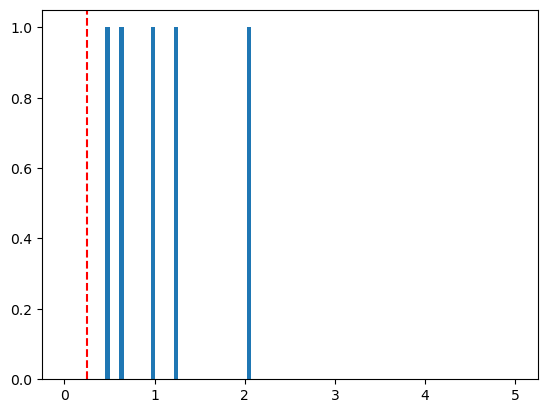

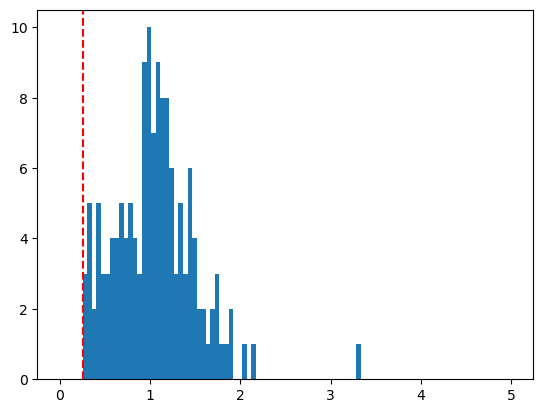

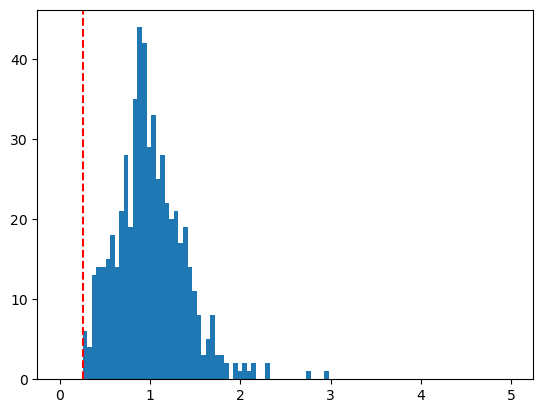

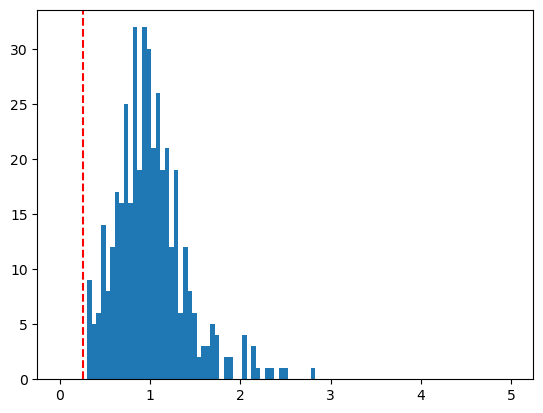

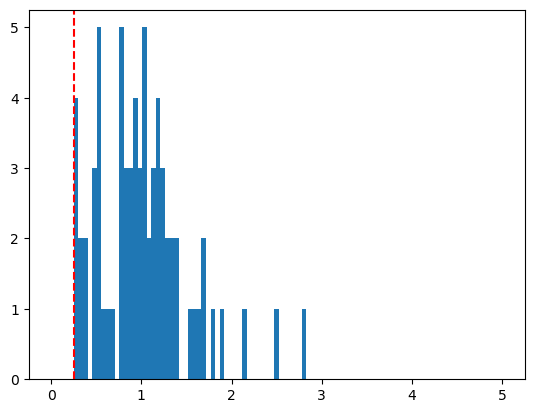

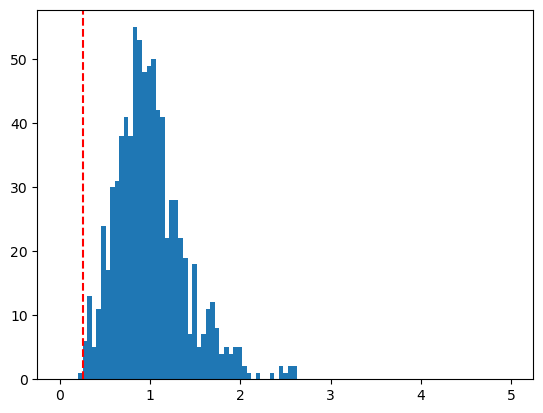

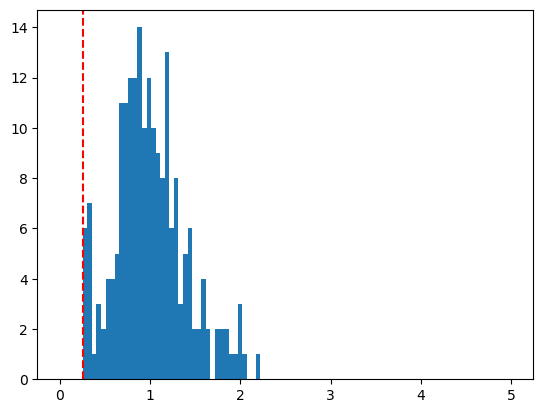

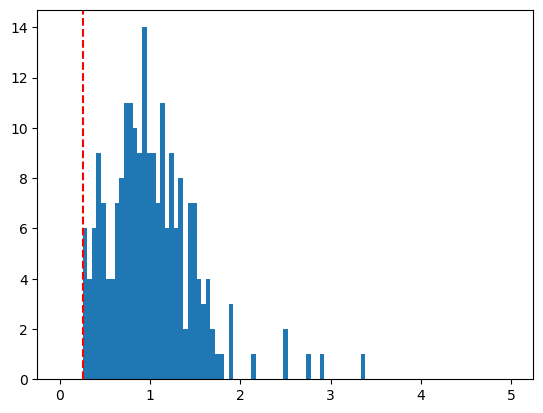

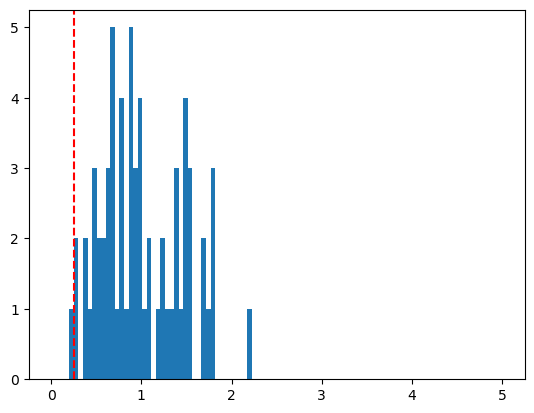

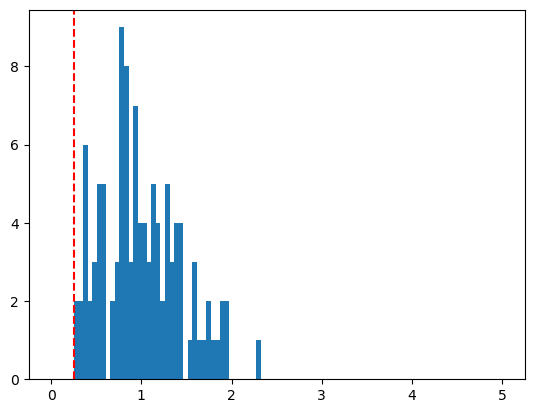

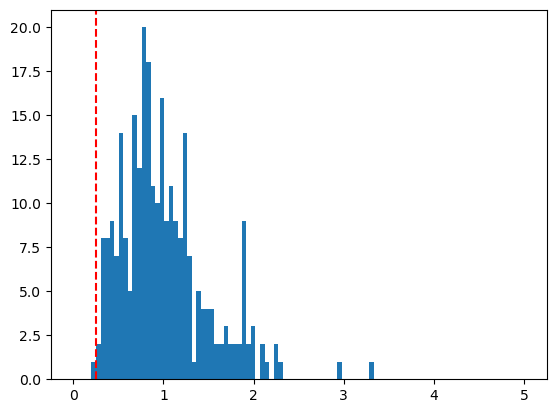

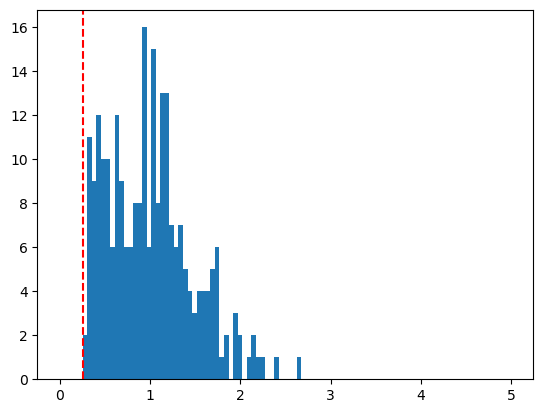

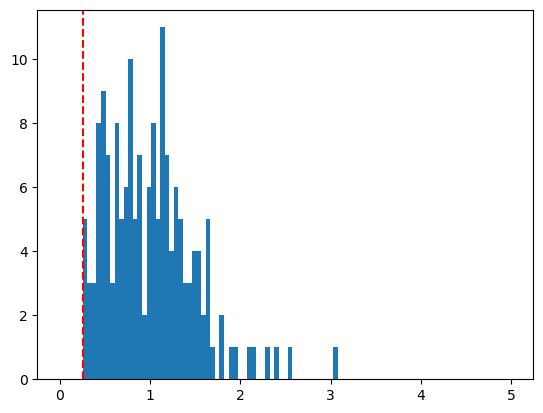

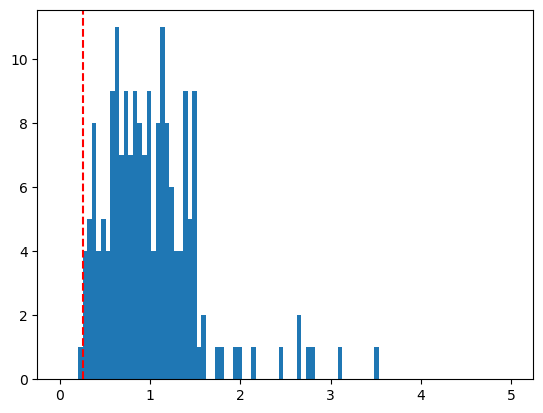

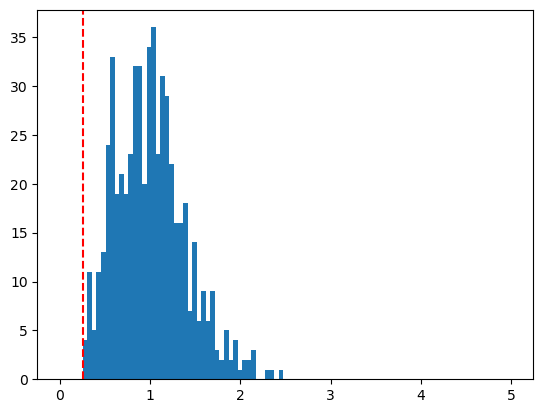

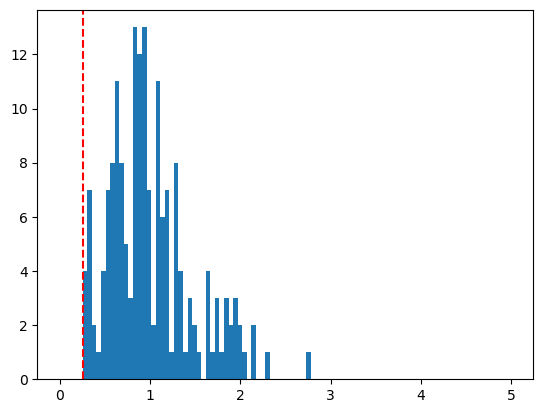

In [45]:
sessions = subjects.mua_sess()
frate_all = []
for sub, sess in enumerate(sessions):
    pre = sess.paradigm["pre"].flatten()
    post = sess.paradigm["post"].flatten()
    neurons = sess.neurons_stable.get_neuron_type(["pyr", "inter"])  # loads .neurons.stable.npy

    rec_duration = sess.eegfile.duration
    windows = np.linspace(0, rec_duration, 6)
    n_windows = len(windows) - 1
    epochs = np.vstack([windows[:-1], windows[1:]]).T

    mean_frate = neurons.firing_rate[:, np.newaxis]

    frate = []
    for i, e in enumerate(epochs):
        if sess.artifact is not None:
            artifact_duration = sess.artifact.time_slice(
                *e, strict=False
            ).durations.sum()
        else:
            artifact_duration = 0
        n_spikes = neurons.time_slice(*e).n_spikes
        e_duration = e[1] - e[0]
        frate.append(n_spikes / (e_duration - artifact_duration))

    frate = np.array(frate).T
    frate_perc = frate / mean_frate

    stable_bool = np.count_nonzero((frate_perc > (1 / 4)), axis=1) == n_windows
    print(f"{stable_bool.sum()/len(stable_bool) * 100} % neurons stable in this session")
    stable_neurons = neurons[stable_bool]
    # sess.neurons_stable.save_with_date(sess.filePrefix.with_suffix('.neurons.stable'))
    # stable_neurons.save(sess.filePrefix.with_suffix(".neurons.stable"))
    frate_all.append(frate_perc)

    _, ax = plt.subplots()
    ax.hist(frate_perc.reshape(-1), bins=np.linspace(0, 5, 100))
    ax.axvline(0.25, color='r', linestyle='--')

frate_all = np.vstack(frate_all)

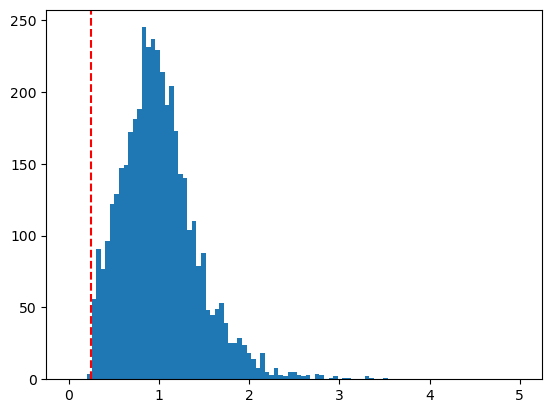

In [44]:
 _, ax = plt.subplots()
ax.hist(frate_all.reshape(-1), bins=np.linspace(0, 5, 100))
ax.axvline(0.25, color='r', linestyle='--')

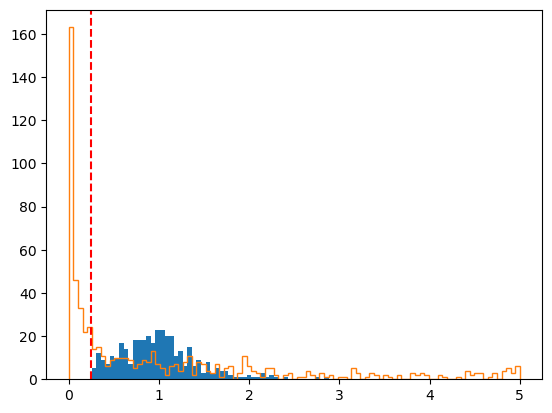

In [38]:
_, ax = plt.subplots()
ax.hist(frate_perc[stable_bool].reshape(-1), bins=np.linspace(0, 5, 100))
ax.hist(frate_perc[~stable_bool].reshape(-1), bins=np.linspace(0, 5, 100), histtype='step')
ax.axvline(0.25, color='r', linestyle='--')

In [21]:
frate_perc[~stable_bool].min(axis=1).mean()

0.054916843280114286

In [13]:
frate_perc

array([[0.18266906, 2.19137383, 1.5273825 , 0.54413709, 0.55443752],
       [1.65116505, 1.00520079, 1.10684999, 0.52076324, 0.71602094],
       [0.        , 0.02415459, 0.14492754, 0.09661836, 4.73429952],
       ...,
       [1.41182757, 1.06314768, 0.70211473, 0.73240914, 1.09050089],
       [0.01721602, 1.11480689, 1.79330748, 1.07341044, 1.00125917],
       [0.78518604, 0.99695975, 1.13983854, 0.97124646, 1.10676922]])

In [8]:
frate

array([[2.05332859e-01, 2.46325811e+00, 1.71688521e+00, 6.11648304e-01,
        6.23226722e-01],
       [3.87569118e+00, 2.35945391e+00, 2.59804963e+00, 1.22235963e+00,
        1.68067756e+00],
       [0.00000000e+00, 6.69272682e-05, 4.01563609e-04, 2.67709073e-04,
        1.31177446e-02],
       ...,
       [1.92757225e+00, 1.45151859e+00, 9.58599263e-01, 9.99960315e-01,
        1.48886401e+00],
       [2.06805259e-02, 1.33914771e+00, 2.15418798e+00, 1.28942075e+00,
        1.20274994e+00],
       [8.80836470e+00, 1.11840819e+01, 1.27869231e+01, 1.08956254e+01,
        1.24159452e+01]])

In [9]:
frate_perc

array([[0.18266906, 2.19137383, 1.5273825 , 0.54413709, 0.55443752],
       [1.65116505, 1.00520079, 1.10684999, 0.52076324, 0.71602094],
       [0.        , 0.02415459, 0.14492754, 0.09661836, 4.73429952],
       ...,
       [1.41182757, 1.06314768, 0.70211473, 0.73240914, 1.09050089],
       [0.01721602, 1.11480689, 1.79330748, 1.07341044, 1.00125917],
       [0.78518604, 0.99695975, 1.13983854, 0.97124646, 1.10676922]])

In [ ]:
_, ax = plt.subplots()

ax.plot(frate_all.T, "o-")
# ax.set_yscale('log')


### Scatter plot for firing rate
- Something similar to supplementary figure of Miyawaki2016

In [ ]:
sessions = subjects.mua_sess()
frate_df = []
for sub, sess in enumerate(sessions):
    pre = sess.paradigm["pre"].flatten()
    maze = sess.paradigm["maze"].flatten()
    post = sess.paradigm["post"].flatten()
    neurons = sess.neurons.get_neuron_type("pyr")
    neurons_id = neurons.neuron_ids
    stable_neurons_id = sess.neurons_stable.get_neuron_type("pyr").neuron_ids

    rec_duration = sess.eegfile.duration
    windows = np.linspace(0, rec_duration, 6)
    n_windows = len(windows) - 1
    epochs = np.vstack([windows[:-1], windows[1:]]).T

    mean_frate = neurons.firing_rate[:, np.newaxis]

    frate = []
    for i, e in enumerate(epochs):
        if sess.artifact is not None:
            artifact_duration = sess.artifact.time_slice(
                *e, strict=False
            ).durations.sum()
        else:
            artifact_duration = 0
        n_spikes = neurons.time_slice(*e).n_spikes
        e_duration = e[1] - e[0]
        frate.append(n_spikes / (e_duration - artifact_duration))

    frate = np.array(frate).T
    df = pd.DataFrame(frate, columns=np.arange(5))
    df["mean_frate"] = mean_frate
    df["stable"] = np.isin(neurons_id, stable_neurons_id, assume_unique=True)
    df["grp"] = sess.tag
    frate_df.append(df)

frate_df = pd.concat(frate_df, ignore_index=True)


In [ ]:
fig = plotting.Fig(grid=(8, 5))

kw = dict(hue="stable", palette=["#22d354", "#c6d2c9"], hue_order=[True, False])

ax = fig.subplot(fig.gs[0])
df = frate_df.sample(n=5, replace=False)
df.iloc[:, :5] = df.iloc[:, :5].div(df.mean_frate, axis=0) * 100
frate_df_long = df.reset_index()
frate_df_long = pd.melt(
    frate_df_long,
    id_vars=["grp", "index", "stable"],
    value_vars=np.arange(5),
    var_name=["epochs"],
    value_name="frate",
    ignore_index=True,
)

sns.lineplot(
    data=frate_df_long,
    x="epochs",
    y="frate",
    units="index",
    estimator=None,
    marker="o",
    ax=ax,
    **kw
)
ax.axhline(25, color="gray", lw=2)
# ax.set_yscale('log')
ax.set_ylim(0, 400)
ax.legend("", frameon=False)

for i, (e1, e2) in enumerate(zip([0, 2, 4], [2, 4, 0])):
    ax = fig.subplot(fig.gs[i + 1])
    sns.scatterplot(
        data=frate_df, x=e1, y=e2, s=7, **kw, ax=ax, legend=False, rasterized=True
    )
    ax.set_xscale("log")
    ax.set_yscale("log")

fig.savefig(subjects.figpath_sd / "frate_stability")


### Firing rate stability using gini coefficient

In [ ]:
sessions = subjects.mua_sess()


In [ ]:
from neuropy.utils.mathutil import gini

frate_all = []
for sub, sess in enumerate(sessions):
    pre = sess.paradigm["pre"].flatten()
    post = sess.paradigm["post"].flatten()

    rec_duration = sess.eegfile.duration
    windows = np.linspace(0, rec_duration, 10)
    neurons = sess.neurons.get_neuron_type(["pyr", "inter"])
    artifact = sess.artifact

    frate_pre = neurons.time_slice(*pre).firing_rate
    frate_post = neurons.time_slice(*post).firing_rate

    frate = []
    for i in np.arange(len(windows) - 1):
        e = windows[i : i + 2]
        artifact_duration = (
            0 if artifact is None else artifact.time_slice(*e).durations.sum()
        )
        n_spikes = neurons.time_slice(*e).n_spikes
        frate.append(n_spikes / (np.diff(e) - artifact_duration))
    frate = np.array(frate).T
    g_coeffs = np.array([gini(_) for _ in frate])

    stable_bool = (g_coeffs <= 0.7) & (frate_pre > 0) & (frate_post > 0)

    stable_neurons = neurons[stable_bool]
    stable_neurons.save(sess.filePrefix.with_suffix(".neurons_stable"))
